In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import re

import seaborn

%matplotlib inline
plt.style.use('ggplot')

mpl.rcParams['figure.figsize'] = (12, 12)

In [2]:
#for fn in os.listdir('./data/kerneltestdata/uncleandata'):
#    with open('./data/kerneltestdata/uncleandata/'+fn, 'r') as fin:
#        data = fin.read().splitlines(True)
#    with open('./data/kerneltestdata/'+fn, 'w') as fout:
#        fout.writelines(data[1:])

In [3]:
bl = pd.read_csv('./data/kerneltestdata/bl2partv3.csv', sep = ',')
c128 = pd.read_csv('./data/kerneltestdata/sync128resultv3.csv', sep = ',')
c256 = pd.read_csv('./data/kerneltestdata/sync256resultv3.csv', sep = ',')
c384 = pd.read_csv('./data/kerneltestdata/sync384resultv3.csv', sep = ',')
c512 = pd.read_csv('./data/kerneltestdata/sync512resultv3.csv', sep = ',')
c768 = pd.read_csv('./data/kerneltestdata/sync768resultv3.csv', sep = ',')
#c896 = pd.read_csv('./data/kerneltestdata/result896.csv', sep = ',')
c896 = pd.read_csv('./data/kerneltestdata/sync896resultv3.csv', sep = ',')
c1024 = pd.read_csv('./data/kerneltestdata/sync1024resultv3.csv', sep = ',')

p1c128 = pd.read_csv('./data/kerneltestdata/1psync128result.csv', sep = ',')
p1c256 = pd.read_csv('./data/kerneltestdata/1psync256result.csv', sep = ',')
p1c384 = pd.read_csv('./data/kerneltestdata/1psync384result.csv', sep = ',')
p1c512 = pd.read_csv('./data/kerneltestdata/1psync512result.csv', sep = ',')
p1c768 = pd.read_csv('./data/kerneltestdata/1psync768result.csv', sep = ',')
p1c896 = pd.read_csv('./data/kerneltestdata/1psync896result.csv', sep = ',')
p1c1024 = pd.read_csv('./data/kerneltestdata/1psync1024result.csv', sep = ',')

nos128 = pd.read_csv('./data/kerneltestdata/nosync128resultv3.csv', sep = ',')
nos256 = pd.read_csv('./data/kerneltestdata/nosync256resultv3.csv', sep = ',')
nos384 = pd.read_csv('./data/kerneltestdata/nosync384resultv3.csv', sep = ',')
nos512 = pd.read_csv('./data/kerneltestdata/nosync512resultv3.csv', sep = ',')
nos768 = pd.read_csv('./data/kerneltestdata/nosync768resultv3.csv', sep = ',')
nos896 = pd.read_csv('./data/kerneltestdata/nosync896resultv3.csv', sep = ',')
nos1024 = pd.read_csv('./data/kerneltestdata/nosync1024resultv3.csv', sep = ',')

ss128 = pd.read_csv('./data/kerneltestdata/single128resultv3.csv', sep = ',')
ss256 = pd.read_csv('./data/kerneltestdata/single256resultv3.csv', sep = ',')
ss384 = pd.read_csv('./data/kerneltestdata/single384resultv3.csv', sep = ',')
ss512 = pd.read_csv('./data/kerneltestdata/single512resultv3.csv', sep = ',')
ss768 = pd.read_csv('./data/kerneltestdata/single768resultv3.csv', sep = ',')
ss896 = pd.read_csv('./data/kerneltestdata/single896resultv3.csv', sep = ',')
ss1024 = pd.read_csv('./data/kerneltestdata/single1024resultv3.csv', sep = ',')

In [4]:
frames1 = [c128,c256,c384,c512,c768,c896,c1024]
frames2 = [p1c128,p1c256,p1c384,p1c512,p1c768,p1c896,p1c1024]
frames3 = [nos128,nos256,nos384,nos512,nos768,nos896,nos1024]
frames4 = [ss128,ss256,ss384,ss512,ss768,ss896,ss1024]
dfsync = pd.concat(frames1, ignore_index=True)
dfp1 = pd.concat(frames2, ignore_index=True)
dfnosync = pd.concat(frames3, ignore_index=True)
dfsingle = pd.concat(frames4, ignore_index=True)
dfsync.columns = dfsync.columns.str.strip()
dfnosync.columns = dfnosync.columns.str.strip()
dfp1.columns = dfp1.columns.str.strip()
dfsingle.columns = dfsingle.columns.str.strip()

In [5]:
#dfsync[dfsync['#size']==1024]
#dfsingle[dfsingle['#size']==1024]


#dfp1.head()


In [6]:
dfsync['avgchunktime']=dfsync.HtDtime/dfsync['no_chunksHtD']
dfnosync['avgchunktime']=dfnosync.HtDtime/dfnosync['no_chunksHtD']
dfsingle['avgchunktime']=dfsingle.HtDtime/dfsingle['no_chunksHtD']
dfp1['avgchunktime']=dfp1.HtDtime/dfp1['no_chunksHtD']

dfsync['type']='synchronized streams'
dfnosync['type']='not synchronized streams'
dfsingle['type']='single stream'
dfp1['type']='single partition synched stream'

In [7]:
tempframes = [dfsync,dfnosync,dfp1,dfsingle]
dftemp=pd.concat(tempframes,ignore_index=True)
dftemp2 = dftemp.loc[dftemp['Kernel']=='partition 2']
dftemp2=dftemp2.append(dfp1)

In [8]:
#dftemp3['avgchunktimeDtH'].isnull()
#dftemp[(dftemp['type']=='single partition synched stream')]# & (dftemp['#size']==4096)]

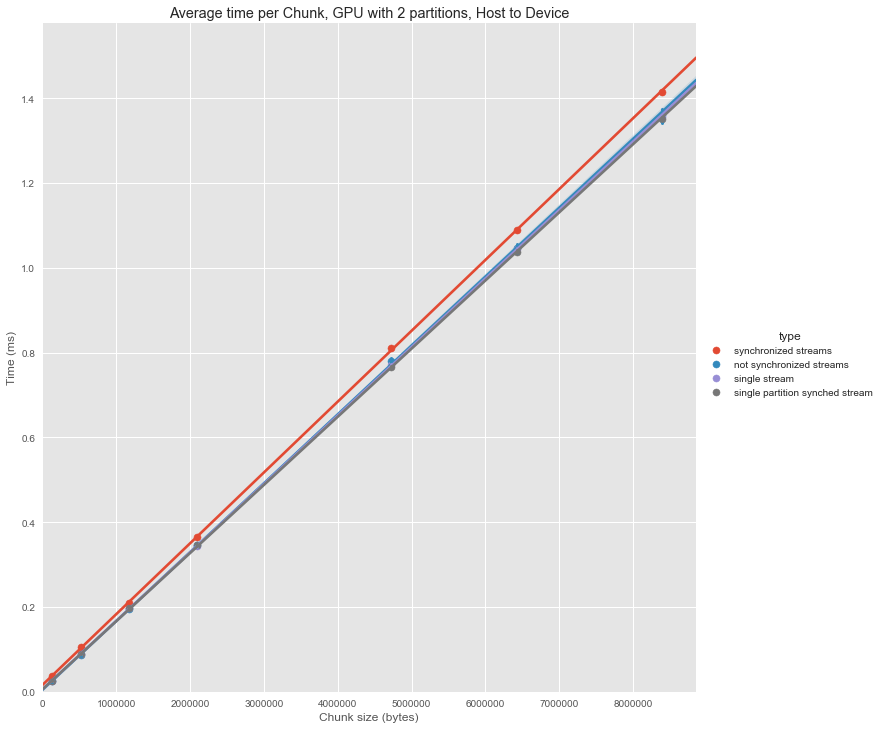

In [9]:


p=seaborn.lmplot(y='avgchunktime', x='chunksize',order=1,hue='type',data=dftemp2,size=10,x_estimator=np.mean)
plt.ylabel('Time (ms)')
plt.xlabel('Chunk size (bytes)')
plt.title('Average time per Chunk, GPU with 2 partitions, Host to Device')
p.set(ylim=(0, None),xlim=(0,None))

In [10]:
dfsync['avgchunktimeDtH']=dfsync.DtHtime/(dfsync['no_chunksDtH']-1)
dfnosync['avgchunktimeDtH']=dfnosync.DtHtime/(dfnosync['no_chunksDtH']-1)
dfp1['avgchunktimeDtH']=dfp1.DtHtime/(dfp1['no_chunksDtH'])

dfsinglep1 = dfsingle.loc[dfsingle['Kernel']=='partition 1']
dfsinglep2 = dfsingle.loc[dfsingle['Kernel']=='partition 2']



dfsinglep1['avgchunktimeDtH']=dfsinglep1.DtHtime/(dfsinglep1['no_chunksDtH'])
dfsinglep2['avgchunktimeDtH']=dfsinglep2.DtHtime/(dfsinglep2['no_chunksDtH']-1)

dfsinglet=pd.concat([dfsinglep1,dfsinglep2],ignore_index=True)


tempframes = [dfsync,dfnosync,dfp1,dfsinglet]
dftemp3=pd.concat(tempframes,ignore_index=True)

#dftemp[(dftemp['type']=='single partition synched stream')]


/Users/erikmelander/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/erikmelander/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


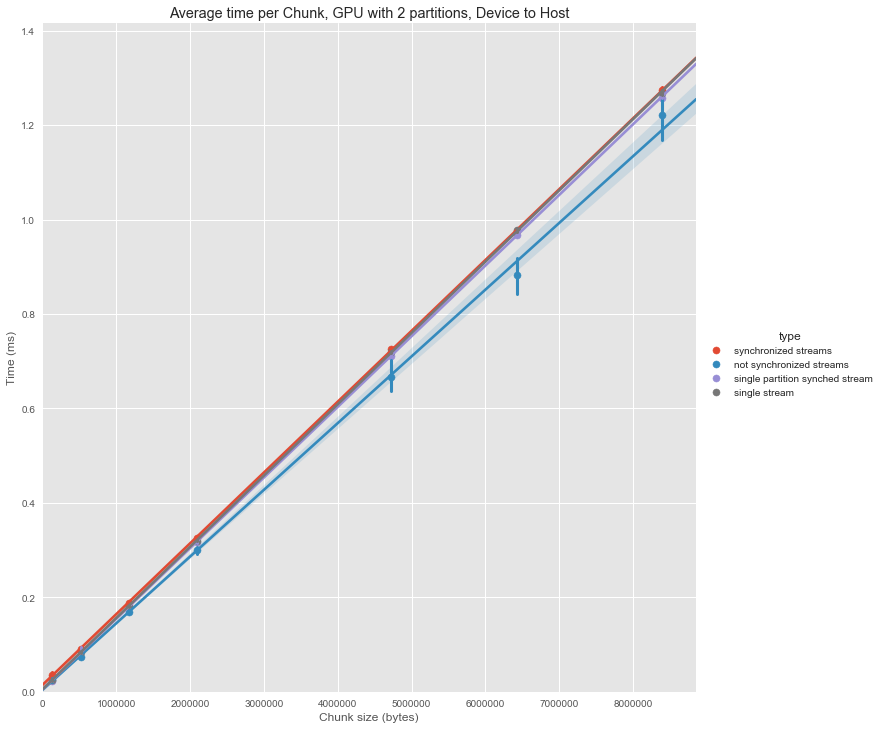

In [11]:

p=seaborn.lmplot(y='avgchunktimeDtH', x='chunksize',order=1,data=dftemp3,hue='type',size=10,x_estimator=np.mean)
plt.ylabel('Time (ms)') 
plt.xlabel('Chunk size (bytes)')
plt.title('Average time per Chunk, GPU with 2 partitions, Device to Host')
p.set(ylim=(0, None),xlim=(0,None))

In [12]:
syncfit = dfsync.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(syncfit['chunksize'],syncfit['avgchunktime'],1)
fsync=np.poly1d(r)
rco = np.corrcoef(syncfit['chunksize'],syncfit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2
t = r[0]*2097152+r[1]
print t,t*96
#syncfit[(syncfit['#size']==2048)]

[  1.67201602e-07   1.54534177e-02] 0.999313664537
0.366100592337 35.1456568643


In [13]:
fit = dfsingle.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
fsingle=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2,fsingle

[  1.61586624e-07   5.27747312e-03] 0.999350775896  
1.616e-07 x + 0.005277


In [14]:
fit = dfp1.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
f1p = np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2

[  1.60780941e-07   4.54775632e-03] 0.999781755785


In [15]:
fit = dftemp3[dftemp3['type']=='single stream']
r = np.polyfit(fit['chunksize'],fit['avgchunktimeDtH'],1)
fsingleDtH=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktimeDtH'])[0,1]
r2 = rco**2
print r,r2,fsingleDtH

fit = dftemp3[dftemp3['type']=='synchronized streams']
r = np.polyfit(fit['chunksize'],fit['avgchunktimeDtH'],1)
fsyncDtH=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktimeDtH'])[0,1]
r2 = rco**2
print r,r2,fsyncDtH

fit = dftemp3[dftemp3['type']=='single partition synched stream']
r = np.polyfit(fit['chunksize'],fit['avgchunktimeDtH'],1)
fp1DtH=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktimeDtH'])[0,1]
r2 = rco**2
print r,r2,fp1DtH

# dfsync['type']='synchronized streams'
# dfnosync['type']='not synchronized streams'
# dfsingle['type']='single stream'
# dfp1['type']='single partition synched stream'

[  1.51015407e-07   4.80240368e-03] 0.997368174557  
1.51e-07 x + 0.004802
[  1.50093494e-07   1.38427943e-02] 0.992597399676  
1.501e-07 x + 0.01384
[  1.49708667e-07   4.38860566e-03] 0.99759971786  
1.497e-07 x + 0.004389


In [16]:
result = sm.OLS(dftemp2['chunksize'],dftemp2['avgchunktime']).fit()
#result.summary()

In [17]:
dftemp3=dftemp2[dftemp2['chunksize']<1100000]

In [18]:
meanandstd = pd.DataFrame()
for f in tempframes:
    for cs in f.chunksize.unique():
        t = np.mean(f[f['chunksize']==cs])


In [19]:
avg128=np.mean(dftemp[dftemp['chunksize']==131072])
stderr128=np.std(dftemp[dftemp['chunksize']==131072])
var128=np.var(dftemp[dftemp['chunksize']==131072])

print avg128['avgchunktime']
print stderr128['avgchunktime']
print var128['avgchunktime']

0.0282242089593
0.0105275949275
0.000110830254958


In [20]:
avg1024=np.mean(dftemp[dftemp['chunksize']==8388608])
stderr1024=np.std(dftemp[dftemp['chunksize']==8388608])
var1024=np.var(dftemp[dftemp['chunksize']==8388608])


print avg1024['avgchunktime']
print stderr1024['avgchunktime']
print var1024['avgchunktime']



1.34240582248
0.0917394349659
0.00841612392785


Model
-----

In [21]:
#if P1 matrix is larger than p2
def memtransfersync(m,n,k,c):
    t1 = m*f1p(c)+(n-1)*fsync(c)
    t2 = m*f1p(c)+(n)*fsync(c)+k*f1p(c)
    return (t1,t2)

def memtransfersyncreturn(m,n,k,c):
    t1 = m*fp1DtH(c)+(n-1)*fsyncDtH(c)
    t2 = m*fp1DtH(c)+n*fsyncDtH(c)+(k)*fp1DtH(c)
    return (t1,t2)

def memtransferstream(m,n,k,c):
    t1 = m*fsingle(c)+(n)*fsingle(c)
    t2 = m*fsingle(c)+n*fsingle(c)+k*fsingle(c)
    return (t1,t2)

def memtransferstreamreturn(m,n,k,c):
    t1 = m*fsingleDtH(c)+(n-1)*fsingleDtH(c)
    t2 = m*fsingleDtH(c)+n*fsingleDtH(c)+k*fsingleDtH(c)
    return (t1,t2)

#memtransfersync(3,6,3,2097152)
#print memtransfersync(0,24,0,2097152)
#print memtransferstream(0,24,0,2097152)

In [22]:
mtest512 = pd.read_csv('./data/kerneltestdata/modeltest512_1536v3.csv', sep = ',')
mtest620 = pd.read_csv('./data/kerneltestdata/modeltest620_1860v3.csv', sep = ',')
mtest920 = pd.read_csv('./data/kerneltestdata/modeltest960_2880v3.csv', sep = ',')
mtest = pd.concat([mtest512,mtest620,mtest920])
mtest.columns = mtest.columns.str.strip()
mtestk1 = mtest[mtest['Kernel']=='partition 1']
mtestk1 = mtestk1[['chunksize','HtDtime']]






model 1


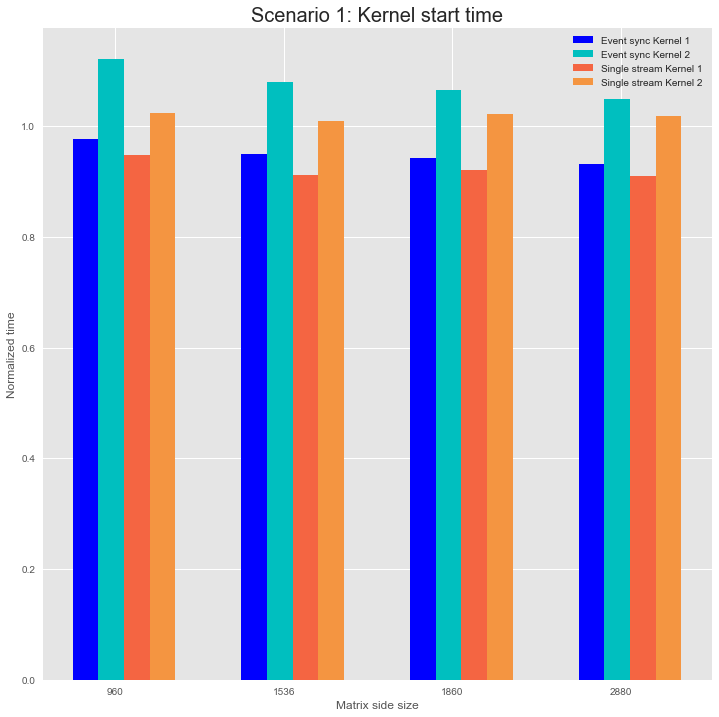

In [23]:
blpart2 = pd.read_csv('./data/kerneltestdata/baseline2partv2.csv', sep = ',')
blpart2.columns = blpart2.columns.str.strip()
p1=blpart2.loc[blpart2["Kernel"]==' partition 0']
p2 = blpart2.loc[blpart2['Kernel']==' partition 1']
m1960= p2.loc[p2['#size']==960,'HtDtime'].mean()
p2960=m1960
m11536 =p2.loc[p2['#size']==1536,'HtDtime'].mean()
p21536=m11536
m11860 = 26.565  # p2.loc[p2['#size']==1860,'HtDtime'].mean()
p21860=m11860
m12880= p2.loc[p2['#size']==2880,'HtDtime'].mean()
p22880=m12880
p1960=p1.loc[p1['#size']==960,'HtDtime'].mean()
p11536=p1.loc[p1['#size']==1536,'HtDtime'].mean()
p11860= 13.293  # p2.loc[p2['#size']==1860,'HtDtime'].mean()
p12880=p1.loc[p1['#size']==2880,'HtDtime'].mean()
p11280= p1.loc[p1['#size']==1280,'HtDtime'].mean()
p21280= p2.loc[p2['#size']==1280,'HtDtime'].mean()

p12048= p1.loc[p1['#size']==2048,'HtDtime'].mean()
p22048=p2.loc[p2['#size']==2048,'HtDtime'].mean()
p12480=23.518 #print p2.loc[p2['#size']==2480,'HtDtime'].mean()
p22480=47.019
p13840 =p1.loc[p1['#size']==3840,'HtDtime'].mean()
p23840=p2.loc[p2['#size']==3840,'HtDtime'].mean()


print "model 1"
sidesize=[960,1536,1860,2880]
m1p1=[]
m1p2=[]
m1p1.append(7.083/m1960)
m1p2.append(8.143/m1960)
m1p1.append(17.320/m11536)
m1p2.append(19.684/m11536)
m1p1.append(25.025/m11860)
m1p2.append(28.309 /m11860)
m1p1.append(59.222/m12880)
m1p2.append(66.673/m12880)

m1sp1=[]
m1sp2=[]
m1sp1.append(6.878/m1960)
m1sp2.append(7.423/m1960)
m1sp1.append(16.645/m11536)
m1sp2.append(18.414/m11536)
m1sp1.append(24.456/m11860)
m1sp2.append(27.155 /m11860)
m1sp1.append(57.878/m12880)
m1sp2.append(64.746/m12880)
size=0.1525
N=len(m1p1)
y=np.arange(N)
fig, ax = plt.subplots()
rects1 = ax.bar(y,m1p1, size, color='b')
rects2 = ax.bar(y+size,m1p2, size, color='c')
rects3 = ax.bar(y+size*2,m1sp1, size, color='#f46542')
rects4 = ax.bar(y+size*3,m1sp2, size, color='#f49541')
plt.title("Scenario 1: Kernel start time",fontsize=20)
ax.set_xticks(y + 0.35 / 2)
ax.set_xticklabels(sidesize)
ax.legend((rects1[0], rects2[0],rects3[0],rects4[0]), ('Event sync Kernel 1', 'Event sync Kernel 2','Single stream Kernel 1', 'Single stream Kernel 2'))
ax.set_xlabel("Matrix side size")
ax.set_ylabel("Normalized time")
plt.show()




25.2484378
[0.707640660072815, 0.6787746685856345, 0.6806544545306301, 0.6723712545947665] [1.099041906519869, 1.0557880931548171, 1.0561504593140187, 1.0423479173346908] [0.6871510646893507, 0.6615854862909579, 0.6625536772299833, 0.659594657580562] [1.0229805304866186, 1.0157064054077836, 1.019867369679839, 1.022683758697376]


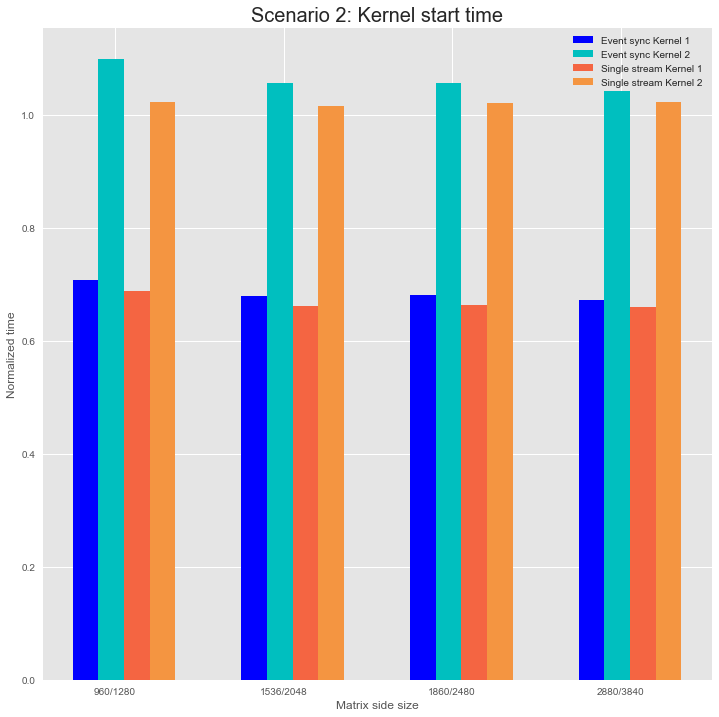

In [105]:
sidesize=["960/1280","1536/2048","1860/2480","2880/3840"]
m1p1=[]
m1p2=[]
p960_1280=p1960+p21280-p11280
p1536_2048=p11536+p22048-p12048
p1860_2480=p11860+p22480-p12480
p2880_3840=p12880+p23840-p13840
print p1536_2048
m1p1.append(7.080/p960_1280)
m1p2.append(10.996/p960_1280)
m1p1.append(17.138/p1536_2048)
m1p2.append(26.657/p1536_2048)
m1p1.append(25.044/p1860_2480)
m1p2.append(38.860 /p1860_2480)
m1p1.append(59.256/p2880_3840)
m1p2.append(91.862/p2880_3840)

m1sp1=[]
m1sp2=[]
m1sp1.append(6.875/p960_1280)
m1sp2.append(10.235/p960_1280)
m1sp1.append(16.704/p1536_2048)
m1sp2.append(25.645/p1536_2048)
m1sp1.append(24.378/p1860_2480)
m1sp2.append(37.525 /p1860_2480)
m1sp1.append(58.130/p2880_3840)
m1sp2.append(90.129/p2880_3840)
size=0.1525
N=len(m1p1)
y=np.arange(N)
fig, ax = plt.subplots()
rects1 = ax.bar(y,m1p1, size, color='b')
rects2 = ax.bar(y+size,m1p2, size, color='c')
rects3 = ax.bar(y+size*2,m1sp1, size, color='#f46542')
rects4 = ax.bar(y+size*3,m1sp2, size, color='#f49541')
ax.set_xticks(y + 0.35 / 2)
ax.set_xticklabels(sidesize)
ax.legend((rects1[0], rects2[0],rects3[0],rects4[0]), ('Event sync Kernel 1', 'Event sync Kernel 2','Single stream Kernel 1', 'Single stream Kernel 2'))
ax.set_xlabel("Matrix side size")
ax.set_ylabel("Normalized time")
plt.title("Scenario 2: Kernel start time",fontsize=20)
print m1p1,m1p2,m1sp1,m1sp2
plt.show()


25.2637204


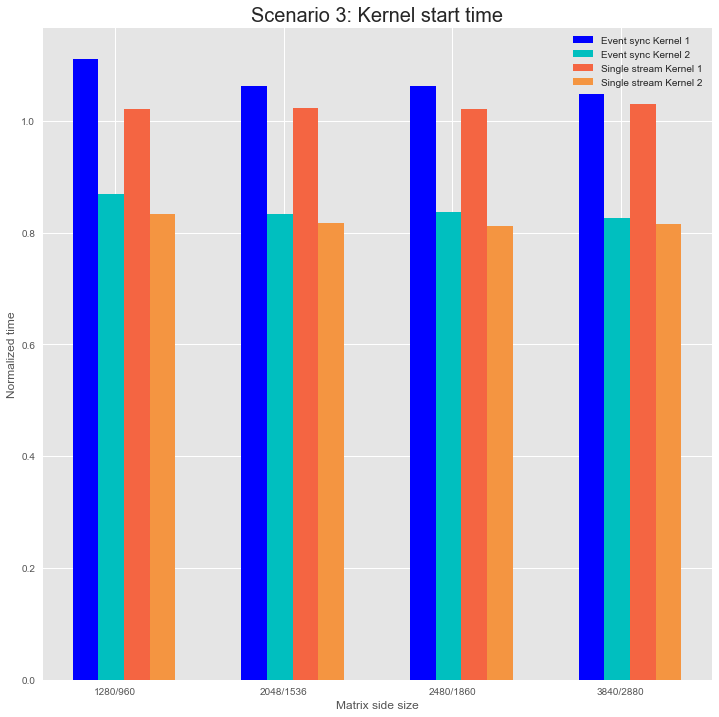

In [25]:
sidesize=["1280/960","2048/1536","2480/1860","3840/2880"]
m1p1=[]
m1p2=[]
p960_1280=p11280+p2960-p1960
p1536_2048=p12048+p21536-p11536
p1860_2480=p12480+p21860-p11860
p2880_3840=p13840+p22880-p12880
print p1536_2048
m1p1.append(11.114/p960_1280)
m1p2.append(8.692/p960_1280)
m1p1.append(26.839/p1536_2048)
m1p2.append(21.073/p1536_2048)
m1p1.append(39.060/p1860_2480)
m1p2.append(30.771 /p1860_2480)
m1p1.append(92.308/p2880_3840)
m1p2.append(72.849/p2880_3840)

m1sp1=[]
m1sp2=[]
m1sp1.append(10.213/p960_1280)
m1sp2.append(8.337/p960_1280)
m1sp1.append(25.848/p1536_2048)
m1sp2.append(20.633/p1536_2048)
m1sp1.append(37.548/p1860_2480)
m1sp2.append(29.899 /p1860_2480)
m1sp1.append(90.821/p2880_3840)
m1sp2.append(71.887/p2880_3840)
size=0.1525
N=len(m1p1)
y=np.arange(N)
fig, ax = plt.subplots()
rects1 = ax.bar(y,m1p1, size, color='b')
rects2 = ax.bar(y+size,m1p2, size, color='c')
rects3 = ax.bar(y+size*2,m1sp1, size, color='#f46542')
rects4 = ax.bar(y+size*3,m1sp2, size, color='#f49541')
ax.set_xticks(y + 0.35 / 2)
ax.set_xticklabels(sidesize)
ax.legend((rects1[0], rects2[0],rects3[0],rects4[0]), ('Event sync Kernel 1', 'Event sync Kernel 2','Single stream Kernel 1', 'Single stream Kernel 2'))
ax.set_xlabel("Matrix side size")
ax.set_ylabel("Normalized time")
plt.title("Scenario 3: Kernel start time",fontsize=20)


plt.show()


(7.2355712393852336, 8.0692937259988504)
7.08269856 0.152872679385 2.11279350762
8.14256704 -0.0732733140012 -0.908051144118
(17.450974612916763, 19.52572434768615)
17.32027802 0.130696592917 0.748935780469
19.68495909 -0.159234742314 -0.815512600088
(25.269073288513159, 28.293611605329644)
25.02518949 0.243883798513 0.965147378887
28.30930136 -0.0156897546703 -0.0554533471697
(59.622255206213595, 66.820219991061919)
59.22210797 0.400147236214 0.671137371154
66.67391098 0.146309011062 0.218959187925


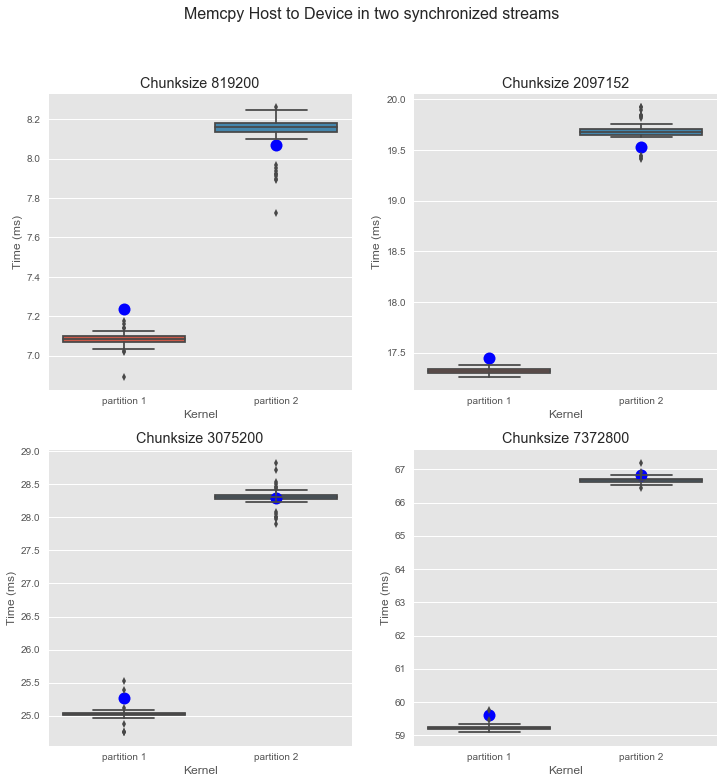

In [26]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest320_960v3.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,5,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100




plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')




plt.subplot(222)

mtest = pd.read_csv('./data/kerneltestdata/modeltest512_1536v3.csv', sep = ',')
h = memtransfersync(5,44,5,2097152)
print h
mtest.columns = mtest.columns.str.strip()
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

mt=mtest
plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
plt.subplot(223)


mtest = pd.read_csv('./data/kerneltestdata/modeltest620_1860v3.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()



mt = mtest #[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,5,3075200)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
plt.subplot(224)


mtest = pd.read_csv('./data/kerneltestdata/modeltest960_2880v3.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest #[mtest['Kernel']=='partition 1']

h = memtransfersync(5,44,5,7372800)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
plt.suptitle('Memcpy Host to Device in two synchronized streams',fontsize=16)
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')
plt.title(title)

(1.4461765958822528, 2.345155654209985)
1.4164096 0.0297669958823 2.05832371835
2.29609376 0.04906189421 2.09205278643
(3.553160940709839, 5.7918752219137826)
3.51955232 0.0336086207098 0.945879493517
5.72776384 0.0641113819138 1.10691925253
(5.1656877214417687, 8.4297342179899761)
5.13723744 0.0284502814418 0.550754961894
8.38557792 0.04415629799 0.523816016592
(12.251224518075004, 20.020640616793564)
12.19869312 0.052531398075 0.428784877769
19.91949434 0.101146276794 0.505209991676


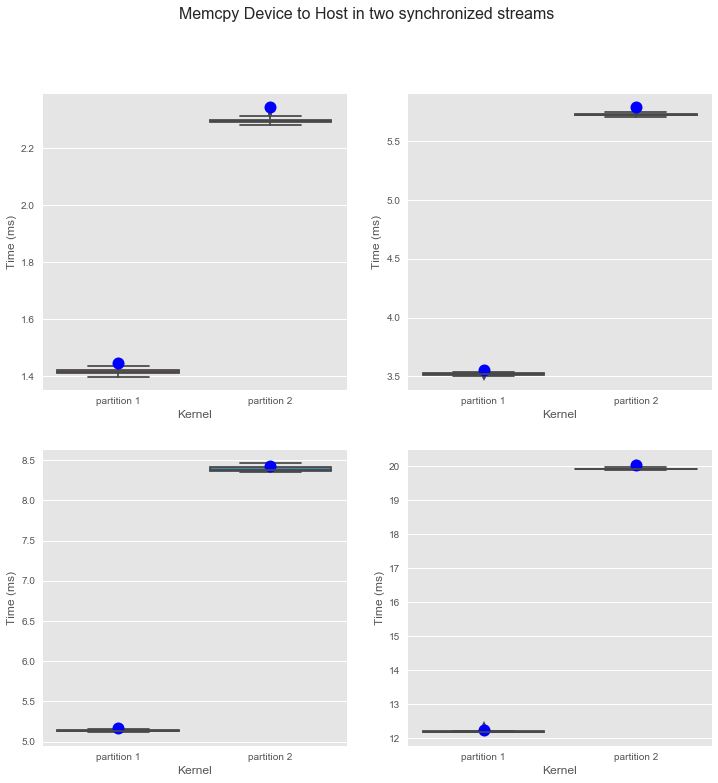

In [27]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest960resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersyncreturn(6,6,6,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

plt.subplot(221)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')




plt.subplot(222)

mtest = pd.read_csv('./data/kerneltestdata/modeltest1536resultv5.csv', sep = ',')
h = memtransfersyncreturn(6,6,6,2097152)
print h
mtest.columns = mtest.columns.str.strip()
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

mt=mtest
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')


plt.subplot(223)


mtest = pd.read_csv('./data/kerneltestdata/modeltest1860resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


h = memtransfersyncreturn(6,6,6,3075200)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

mt = mtest #[mtest['Kernel']=='partition 1']
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')



plt.subplot(224)


mtest = pd.read_csv('./data/kerneltestdata/modeltest2880resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest #[mtest['Kernel']=='partition 1']

h = memtransfersyncreturn(6,6,6,7372800)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
plt.suptitle('Memcpy Device to Host in two synchronized streams',fontsize=16)
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')

(6.7448125243573891, 7.433058700312225)
6.87879232 -0.133979795643 -1.98641244896
7.42312 0.00993870031222 0.133709428553
(16.863310017361449, 18.584055937500374)
16.64553544 0.217774577361 1.29141062542
18.41460545 0.1694504875 0.911805733206
(24.607244246532527, 27.11818753699503)
24.45660001 0.150644236533 0.61219466521
27.15577297 -0.037585433005 -0.138598617454
(58.634543257711549, 64.617659916661708)
57.87869756 0.755845697712 1.28907919414
64.7468682 -0.129208283338 -0.199958159279


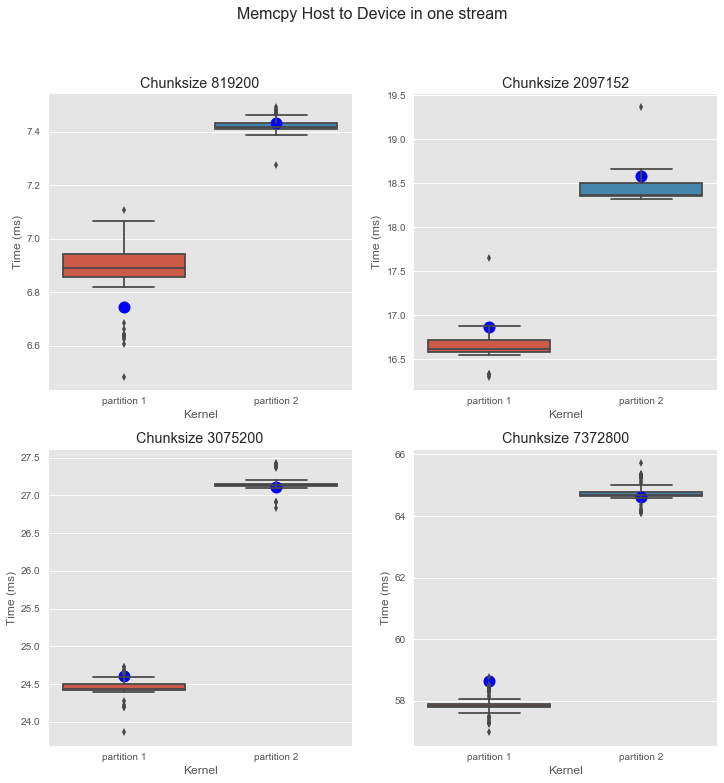

In [28]:
#mtest = pd.read_csv('./data/kerneltestdata/cpstmodel1960.csv', sep = ',')
mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream960resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1536resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,2097152)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(222)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1860resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,3075200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(223)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream2880resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,7372800)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(224)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



plt.suptitle('Memcpy Host to Device in one stream',fontsize=16)
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

1.384 & 1.414 & 0.030 & 2.10
2.262 & 2.313 & 0.051 & 2.21
3.477 & 3.537 & 0.060 & 1.68
5.683 & 5.787 & 0.104 & 1.79
5.098 & 5.161 & 0.063 & 1.23
8.334 & 8.446 & 0.112 & 1.33
12.127 & 12.300 & 0.173 & 1.41
19.831 & 20.128 & 0.297 & 1.48


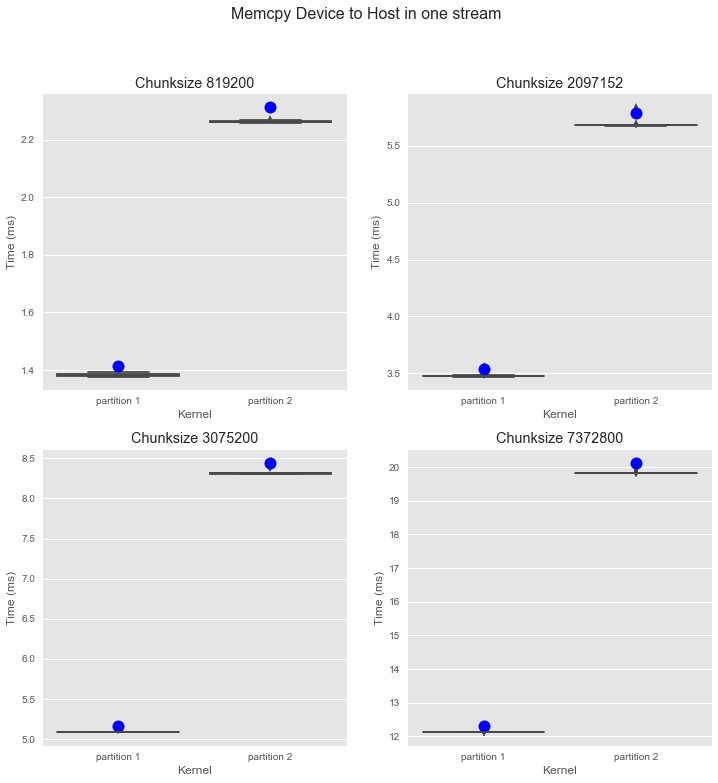

In [29]:
mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream960resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,819200)
#print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print "%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)
print "%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)

plt.subplot(221)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1536resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,2097152)
#print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print "%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)
print "%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)

plt.subplot(222)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')


mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1860resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,3075200)
#print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print "%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)
print "%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)

plt.subplot(223)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream2880resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,7372800)
#print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']

print "%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)
print "%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)

plt.subplot(224)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
plt.suptitle('Memcpy Device to Host in one stream',fontsize=16)

title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

In [30]:
mtest.head()

,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,2880,47775.744,0.808,234.090,237.941,7372800,199065600,66355200,54,18,partition 1,56.970848,161.146591,12.121216
1,2880,47775.744,0.808,234.090,237.941,7372800,199065600,66355200,54,18,partition 2,64.082848,161.124283,19.823521
2,2880,47775.744,0.411,235.070,238.921,7372800,199065600,66355200,54,18,partition 1,57.606495,161.493500,12.118688
3,2880,47775.744,0.411,235.070,238.921,7372800,199065600,66355200,54,18,partition 2,64.737411,161.257370,19.821377
4,2880,47775.744,0.588,235.611,239.462,7372800,199065600,66355200,54,18,partition 1,58.374241,161.266693,12.118272


Model 2 First partition 1 smaller
-------------------------------

In [31]:
#if P1 matrix is larger than p2
def memtransfersync(m,n,k,c):
    t1 = m*f1p(c)+(n-1)*fsync(c)
    t2 = m*f1p(c)+(n)*fsync(c)+k*f1p(c)
    return (t1,t2)

def memtransfersyncreturnm2(m,n,k,c):
    t1 = m*fp1DtH(c)+(n)*fsyncDtH(c)
    t2 = n*fsyncDtH(c)+(k)*fp1DtH(c)
    return (t1,t2)

def memtransferstream(m,n,k,c):
    t1 = m*fsingle(c)+(n)*fsingle(c)
    t2 = m*fsingle(c)+n*fsingle(c)+k*fsingle(c)
    return (t1,t2)

def memtransferstreamreturnm2(m,n,k,c):
    t1 = m*fsingleDtH(c)+(n)*fsingleDtH(c)
    t2 = n*fsingleDtH(c)+k*fsingleDtH(c)
    return (t1,t2)

#memtransfersync(3,6,3,2097152)
#print memtransfersync(0,24,0,2097152)
#print memtransferstream(0,24,0,2097152)

In [32]:
def printall(mtest,h,c):
    mt = mtest #[mtest['Kernel']=='partition 1']
    mtp1=mtest[mtest['Kernel']=='partition 1']
    mtp2=mtest[mtest['Kernel']=='partition 2']
    k1= "Kernel 1 size " + str(c) +" & "
    k2="Kernel 2 size " + str(c) +" & "
    print k1+"%.3f & %.3f & %.3f & %.2f" % (mtp1['HtDtime'].mean(),h[0], (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100)+"\\\\ \hline"
    print k2+"%.3f & %.3f & %.3f & %.2f" % (mtp2['HtDtime'].mean(),h[1], (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100)+"\\\\ \hline"


    plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
    plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
    #mt['HtDtime'].plot(kind = 'box')
    seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


    s= mt['chunksize'].unique()
    title = "Chunksize " + str(s[0])
    plt.title(title)
    plt.ylabel('Time (ms)')
    
def printallDtH(mtest,h,c):
    mt = mtest #[mtest['Kernel']=='partition 1']
    mtp1=mtest[mtest['Kernel']=='partition 1']
    mtp2=mtest[mtest['Kernel']=='partition 2']
    k1= "Kernel 1 size " + str(c) +" & "
    k2="Kernel 2 size " + str(c) +" & "
    print k1+"%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)+"\\\\ \hline"
    print k2+"%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)+"\\\\ \hline"


    plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
    plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
    #mt['HtDtime'].plot(kind = 'box')
    seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


    s= mt['chunksize'].unique()
    title = "Chunksize " + str(s[0])
    plt.title(title)
    plt.ylabel('Time (ms)')

Kernel 1 size 819200 & 6.875 & 6.745 & -0.130 & -1.93\\ \hline
Kernel 2 size 819200 & 10.235 & 10.324 & 0.088 & 0.86\\ \hline
Kernel 1 size 2097152 & 16.704 & 16.863 & 0.159 & 0.95\\ \hline
Kernel 2 size 2097152 & 25.645 & 25.811 & 0.166 & 0.64\\ \hline
Kernel 1 size 3075200 & 24.378 & 24.607 & 0.229 & 0.93\\ \hline
Kernel 2 size 3075200 & 37.525 & 37.664 & 0.139 & 0.37\\ \hline
Kernel 1 size 7372800 & 58.130 & 58.635 & 0.505 & 0.86\\ \hline
Kernel 2 size 7372800 & 90.129 & 89.747 & -0.382 & -0.43\\ \hline


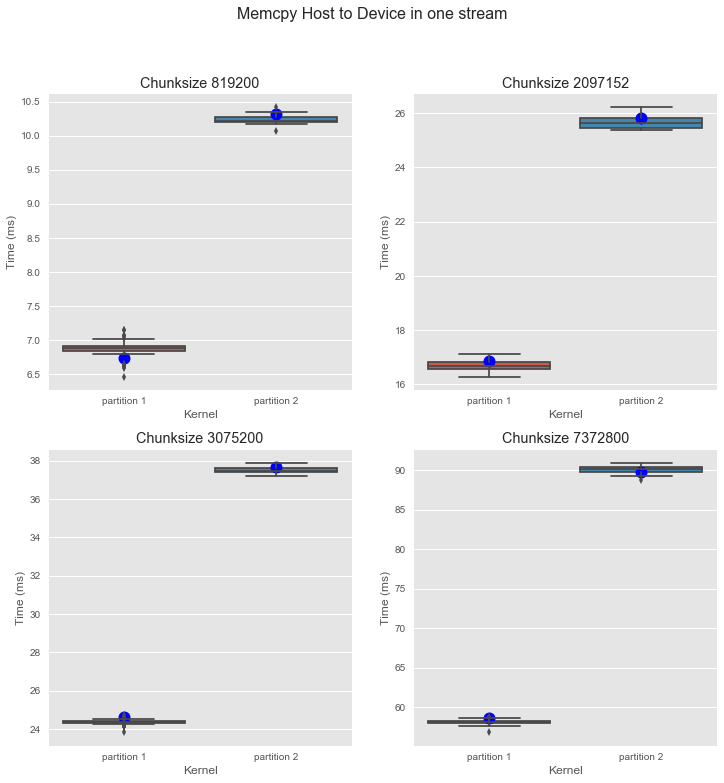

In [33]:
mtest = pd.read_csv('./data/kerneltestdata/model2stream_960result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
plt.subplot(221)
h = memtransferstream(5,44,26,819200)
printall(mtest,h,819200)



mtest = pd.read_csv('./data/kerneltestdata/model2stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransferstream(5,44,26,2097152)


printall(mtest,h,2097152)



mtest = pd.read_csv('./data/kerneltestdata/model2stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransferstream(5,44,26,3075200)


printall(mtest,h,3075200)


mtest = pd.read_csv('./data/kerneltestdata/model2stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.subplot(224)
h = memtransferstream(5,44,26,7372800)


printall(mtest,h,7372800)



plt.suptitle('Memcpy Host to Device in one stream',fontsize=16)




Kernel 1 size 819200 & 7.080 & 7.236 & 0.156 & 2.15\\ \hline
Kernel 2 size 819200 & 10.996 & 10.931 & -0.066 & -0.60\\ \hline
Kernel 1 size 2097152 & 17.138 & 17.451 & 0.313 & 1.79\\ \hline
Kernel 2 size 2097152 & 26.657 & 26.702 & 0.045 & 0.17\\ \hline
Kernel 1 size 2097152 & 25.044 & 25.269 & 0.225 & 0.89\\ \hline
Kernel 2 size 2097152 & 38.860 & 38.772 & -0.088 & -0.23\\ \hline
Kernel 1 size 2097152 & 59.256 & 59.622 & 0.367 & 0.61\\ \hline
Kernel 2 size 2097152 & 91.862 & 91.809 & -0.052 & -0.06\\ \hline


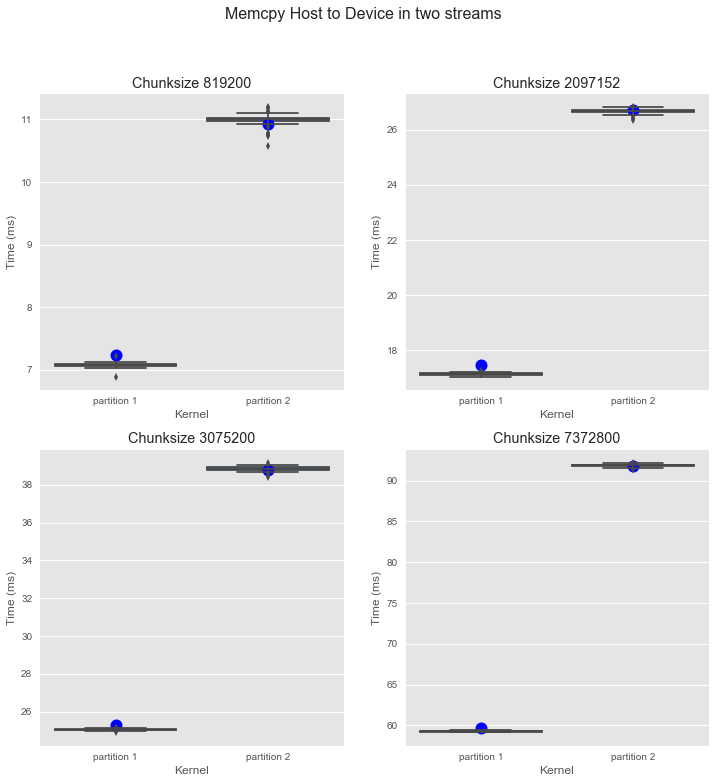

In [34]:
mtest = pd.read_csv('./data/kerneltestdata/model2sync_960result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransfersync(5,44,26,819200)
printall(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model2sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransfersync(5,44,26,2097152)
printall(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model2sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransfersync(5,44,26,3075200)
printall(mtest,h,2097152)

mtest = pd.read_csv('./data/kerneltestdata/model2sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransfersync(5,44,26,7372800)
printall(mtest,h,2097152)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Host to Device in two streams',fontsize=16)


Kernel 1 size 819200 & 1.156 & 1.143 & -0.012 & -1.08\\ \hline
Kernel 2 size 819200 & 2.019 & 2.032 & 0.014 & 0.67\\ \hline
Kernel 1 size 2097152 & 2.876 & 2.865 & -0.011 & -0.38\\ \hline
Kernel 2 size 2097152 & 5.081 & 5.094 & 0.012 & 0.24\\ \hline
Kernel 1 size 2097152 & 4.193 & 4.183 & -0.010 & -0.24\\ \hline
Kernel 2 size 2097152 & 7.444 & 7.436 & -0.008 & -0.11\\ \hline
Kernel 1 size 2097152 & 9.972 & 9.973 & 0.002 & 0.02\\ \hline
Kernel 2 size 2097152 & 17.684 & 17.731 & 0.046 & 0.26\\ \hline


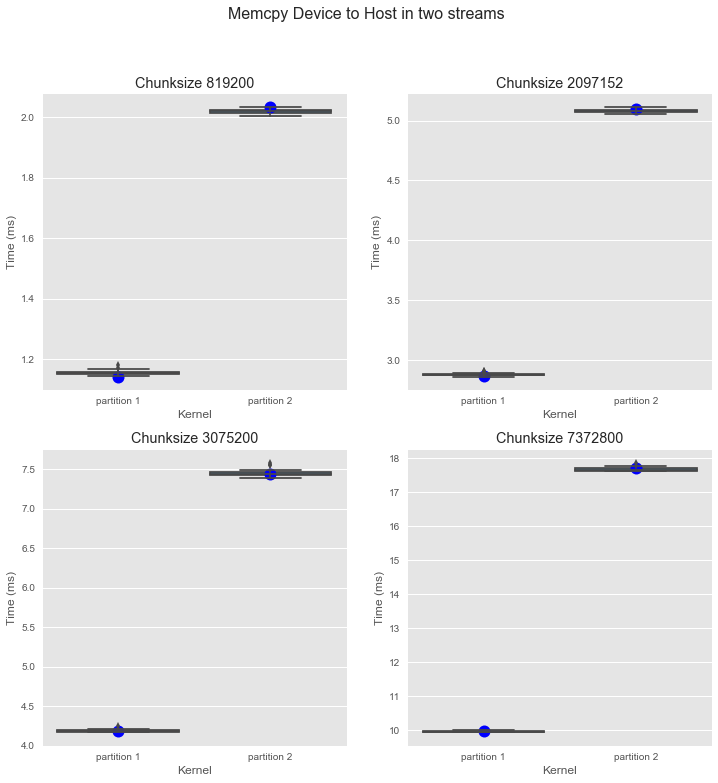

In [35]:
mtest = pd.read_csv('./data/kerneltestdata/model2sync_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransfersyncreturnm2(9,0,16,819200)
printallDtH(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model2sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransfersyncreturnm2(9,0,16,2097152)
printallDtH(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model2sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransfersyncreturnm2(9,0,16,3075200)
printallDtH(mtest,h,2097152)

mtest = pd.read_csv('./data/kerneltestdata/model2sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransfersyncreturnm2(9,0,16,7372800)
printallDtH(mtest,h,2097152)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Device to Host in two streams',fontsize=16)

Kernel 1 size 819200 & 1.155 & 1.157 & 0.002 & 0.13\\ \hline
Kernel 2 size 819200 & 2.019 & 2.056 & 0.037 & 1.79\\ \hline
Kernel 1 size 2097152 & 2.864 & 2.894 & 0.030 & 1.03\\ \hline
Kernel 2 size 2097152 & 5.057 & 5.144 & 0.087 & 1.69\\ \hline
Kernel 1 size 3075200 & 4.177 & 4.223 & 0.046 & 1.09\\ \hline
Kernel 2 size 3075200 & 7.387 & 7.507 & 0.120 & 1.60\\ \hline
Kernel 1 size 7372800 & 9.977 & 10.064 & 0.087 & 0.86\\ \hline
Kernel 2 size 7372800 & 17.661 & 17.891 & 0.230 & 1.29\\ \hline


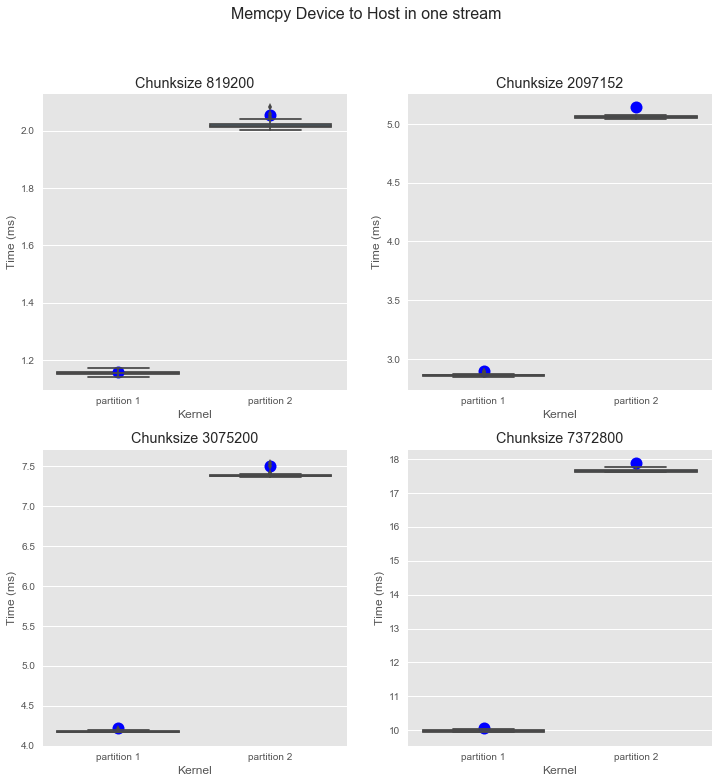

In [36]:
mtest = pd.read_csv('./data/kerneltestdata/model2stream_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransferstreamreturnm2(9,0,16,819200)
printallDtH(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model2stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransferstreamreturnm2(9,0,16,2097152)
printallDtH(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model2stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransferstreamreturnm2(9,0,16,3075200)
printallDtH(mtest,h,3075200)

mtest = pd.read_csv('./data/kerneltestdata/model2stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransferstreamreturnm2(9,0,16,7372800)
printallDtH(mtest,h,7372800)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Device to Host in one stream',fontsize=16)

model 3 partition 1 bigger than 2
---------------------------------

In [37]:
#if P1 matrix is larger than p2
def memtransfersyncm3(m,n,k,c):
    t1 = m*f1p(c)+n*fsync(c)+k*f1p(c)
    t2 = m*f1p(c)+(n)*fsync(c)
    return (t1,t2)

def memtransfersyncreturnm3(m,n,k,c):
    t1 = m*fp1DtH(c)+n*fsyncDtH(c)
    t2 = n*fsyncDtH(c)+k*fp1DtH(c)
    return (t1,t2)

def memtransferstreamm3(m,n,k,c):
    t1 = m*fsingle(c)+(n)*fsingle(c)+k*fsingle(c)
    t2 = m*fsingle(c)+n*fsingle(c)
    return (t1,t2)

def memtransferstreamreturnm3(m,n,k,c):
    t1 = m*fsingleDtH(c)+(n)*fsingleDtH(c)
    t2 = (n)*fsingleDtH(c)+k*fsingleDtH(c)
    return (t1,t2)

#memtransfersync(3,6,3,2097152)
#print memtransfersync(0,24,0,2097152)
#print memtransferstream(0,24,0,2097152)

Kernel 1 size 819200 & 11.114 & 11.092 & -0.021 & -0.19\\ \hline
Kernel 2 size 819200 & 8.692 & 8.912 & 0.220 & 2.47\\ \hline
Kernel 1 size 2097152 & 26.839 & 26.946 & 0.107 & 0.40\\ \hline
Kernel 2 size 2097152 & 21.073 & 21.478 & 0.405 & 1.89\\ \hline
Kernel 1 size 2097152 & 39.060 & 39.079 & 0.019 & 0.05\\ \hline
Kernel 2 size 2097152 & 30.771 & 31.095 & 0.324 & 1.04\\ \hline
Kernel 1 size 2097152 & 92.308 & 92.392 & 0.084 & 0.09\\ \hline
Kernel 2 size 2097152 & 72.849 & 73.352 & 0.504 & 0.69\\ \hline


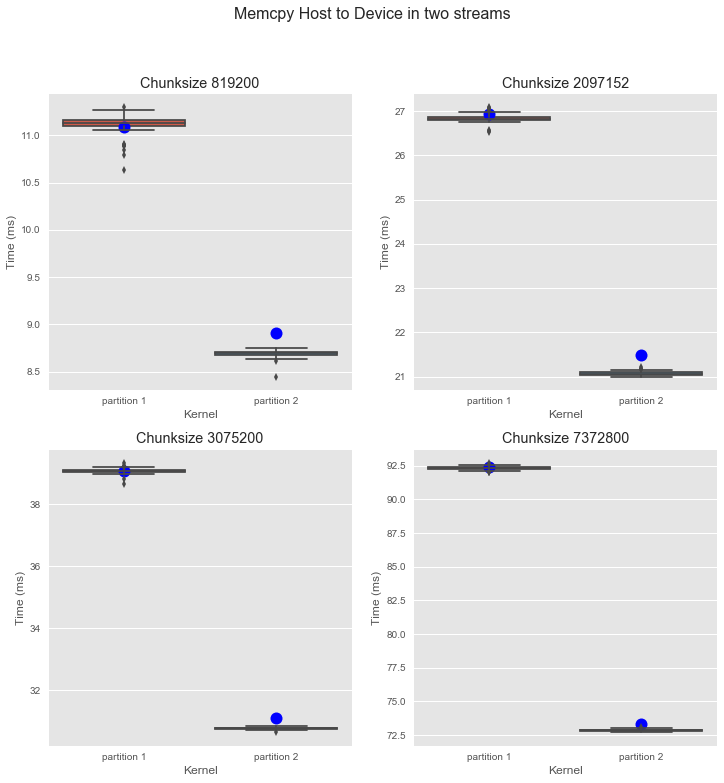

In [38]:
mtest = pd.read_csv('./data/kerneltestdata/model3sync_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransfersyncm3(5,54,16,819200)
printall(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model3sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransfersyncm3(5,54,16,2097152)
printall(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model3sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransfersyncm3(5,54,16,3075200)
printall(mtest,h,2097152)

mtest = pd.read_csv('./data/kerneltestdata/model3sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransfersyncm3(5,54,16,7372800)
printall(mtest,h,2097152)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Host to Device in two streams',fontsize=16)


Kernel 1 size 819200 & 10.213 & 10.324 & 0.111 & 1.07\\ \hline
Kernel 2 size 819200 & 8.337 & 8.121 & -0.216 & -2.66\\ \hline
Kernel 1 size 2097152 & 25.848 & 25.811 & -0.036 & -0.14\\ \hline
Kernel 2 size 2097152 & 20.633 & 20.305 & -0.328 & -1.62\\ \hline
Kernel 1 size 2097152 & 37.548 & 37.664 & 0.116 & 0.31\\ \hline
Kernel 2 size 2097152 & 29.899 & 29.629 & -0.270 & -0.91\\ \hline
Kernel 1 size 2097152 & 90.821 & 89.747 & -1.074 & -1.20\\ \hline
Kernel 2 size 2097152 & 71.887 & 70.601 & -1.287 & -1.82\\ \hline


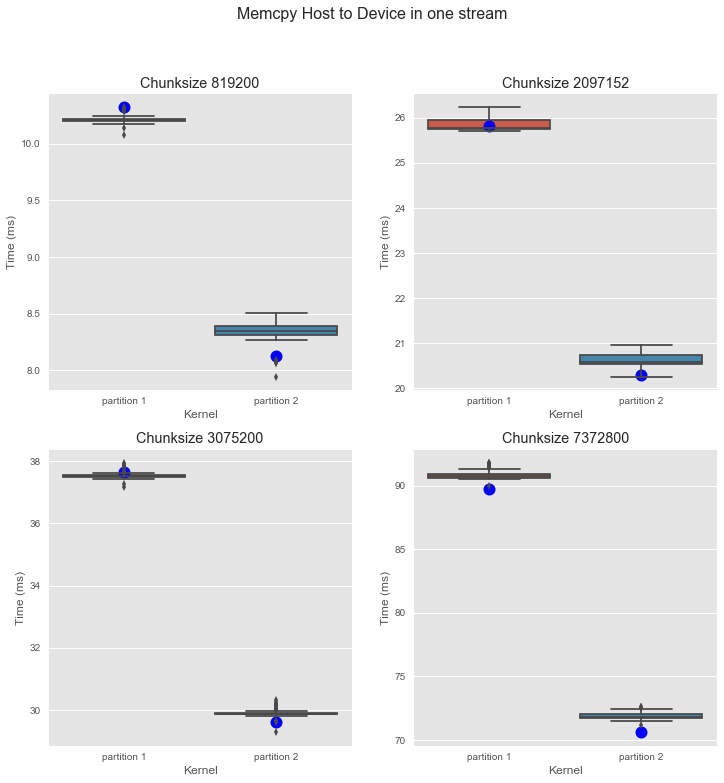

In [39]:
mtest = pd.read_csv('./data/kerneltestdata/model3stream_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransferstreamm3(5,54,16,819200)
printall(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model3stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransferstreamm3(5,54,16,2097152)
printall(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model3stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransferstreamm3(5,54,16,3075200)
printall(mtest,h,2097152)

mtest = pd.read_csv('./data/kerneltestdata/model3stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransferstreamm3(5,54,16,7372800)
printall(mtest,h,2097152)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Host to Device in one stream',fontsize=16)

Kernel 1 size 819200 & 2.022 & 2.032 & 0.010 & 0.51\\ \hline
Kernel 2 size 819200 & 1.154 & 1.143 & -0.011 & -0.98\\ \hline
Kernel 1 size 2097152 & 5.073 & 5.094 & 0.020 & 0.40\\ \hline
Kernel 2 size 2097152 & 2.877 & 2.865 & -0.012 & -0.42\\ \hline
Kernel 1 size 3075200 & 7.466 & 7.436 & -0.030 & -0.40\\ \hline
Kernel 2 size 3075200 & 4.202 & 4.183 & -0.019 & -0.45\\ \hline
Kernel 1 size 7372800 & 17.662 & 17.731 & 0.069 & 0.39\\ \hline
Kernel 2 size 7372800 & 9.978 & 9.973 & -0.004 & -0.04\\ \hline


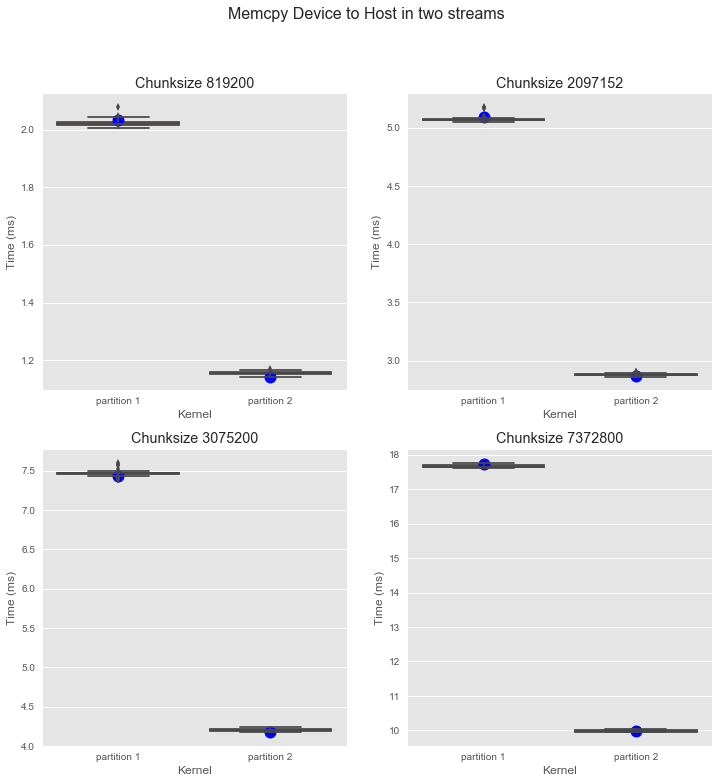

In [40]:
mtest = pd.read_csv('./data/kerneltestdata/model3sync_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransfersyncreturnm3(16,0,9,819200)
printallDtH(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model3sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransfersyncreturnm3(16,0,9,2097152)
printallDtH(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model3sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransfersyncreturnm3(16,0,9,3075200)
printallDtH(mtest,h,3075200)

mtest = pd.read_csv('./data/kerneltestdata/model3sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransfersyncreturnm3(16,0,9,7372800)
printallDtH(mtest,h,7372800)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Device to Host in two streams',fontsize=16)

Kernel 1 size 819200 & 2.015 & 2.056 & 0.041 & 2.02\\ \hline
Kernel 2 size 819200 & 1.151 & 1.157 & 0.005 & 0.47\\ \hline
Kernel 1 size 2097152 & 5.075 & 5.144 & 0.069 & 1.34\\ \hline
Kernel 2 size 2097152 & 2.873 & 2.894 & 0.021 & 0.72\\ \hline
Kernel 1 size 3075200 & 7.426 & 7.507 & 0.081 & 1.08\\ \hline
Kernel 2 size 3075200 & 4.195 & 4.223 & 0.028 & 0.66\\ \hline
Kernel 1 size 7372800 & 17.696 & 17.891 & 0.196 & 1.09\\ \hline
Kernel 2 size 7372800 & 9.976 & 10.064 & 0.088 & 0.87\\ \hline


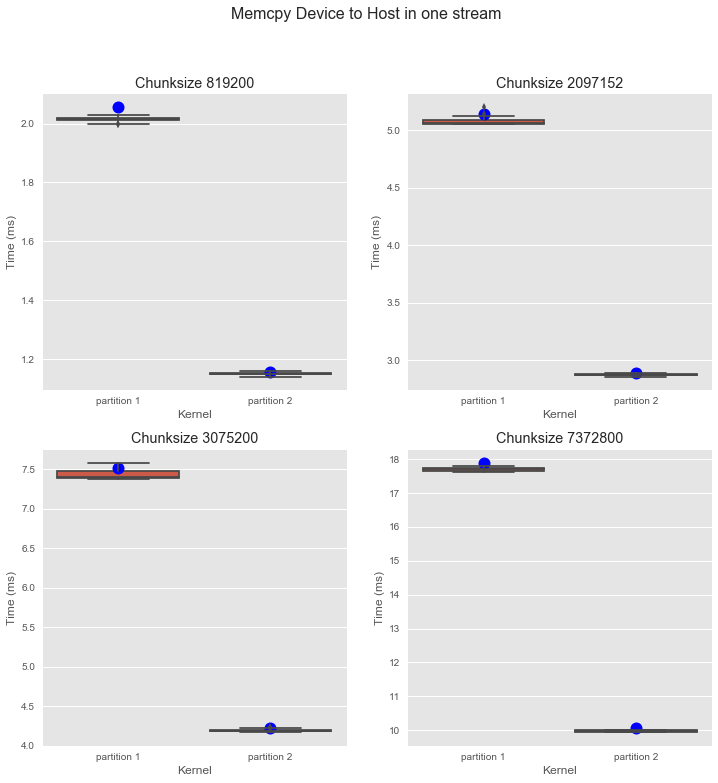

In [41]:
mtest = pd.read_csv('./data/kerneltestdata/model3stream_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransferstreamreturnm3(16,0,9,819200)
printallDtH(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model3stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransferstreamreturnm3(16,0,9,2097152)
printallDtH(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model3stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransferstreamreturnm3(16,0,9,3075200)
printallDtH(mtest,h,3075200)

mtest = pd.read_csv('./data/kerneltestdata/model3stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransferstreamreturnm3(16,0,9,7372800)
printallDtH(mtest,h,7372800)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Device to Host in one stream',fontsize=16)

At this point we're going to calculate a normalized overhead using our baseline
--------------------------------------------------------------------------

In [42]:
bl.columns = bl.columns.str.strip()
bl.head()

,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,128,4.194,0.110,0.0,1.267,65536,393216,131072,6,2,partition 0,0.126709,0.951172,0.066895
1,128,4.194,0.110,0.0,1.267,65536,393216,131072,6,2,partition 1,0.218750,0.951172,0.030029
2,128,4.194,0.093,0.0,0.809,65536,393216,131072,6,2,partition 0,0.097900,0.526855,0.066895
3,128,4.194,0.093,0.0,0.809,65536,393216,131072,6,2,partition 1,0.186279,0.526855,0.029053
4,128,4.194,0.046,0.0,0.475,65536,393216,131072,6,2,partition 0,0.113037,0.205078,0.035889


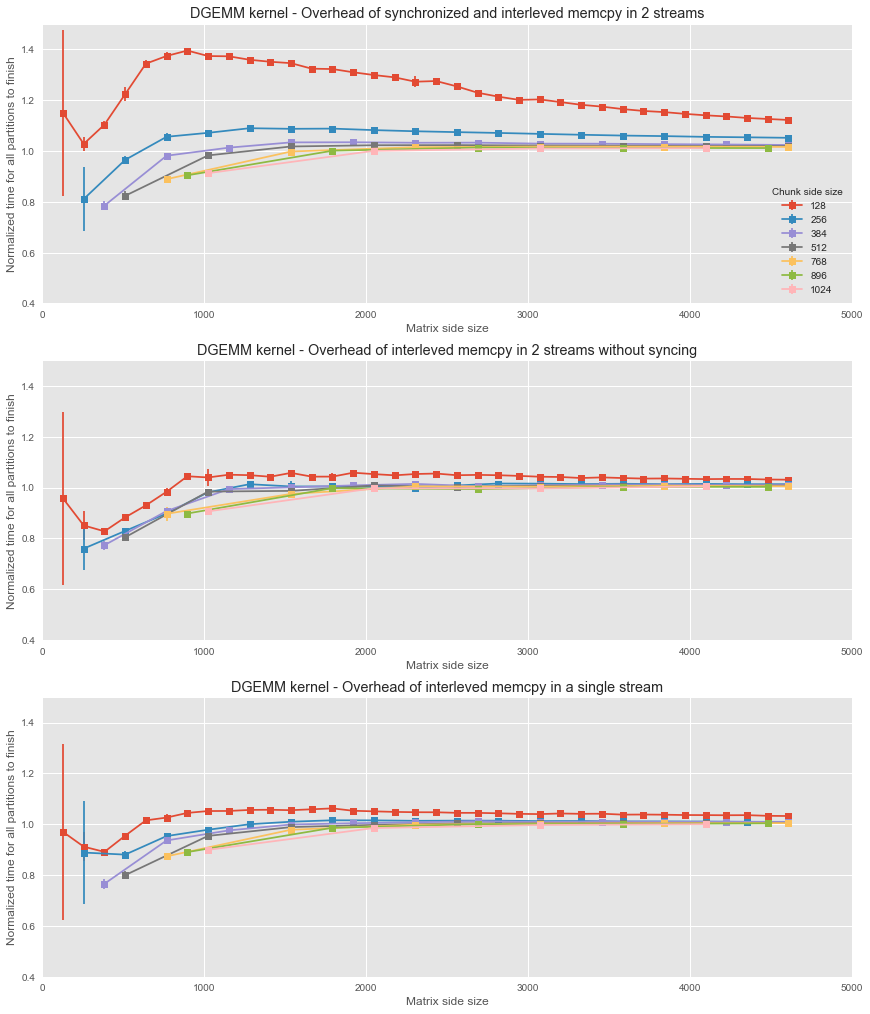

In [43]:
plt.figure(figsize=(12,14))
normalizeddf = dfsync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(311)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
plt.legend([128,256,384,512,768,896,1024],title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

normalizeddf = dfnosync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(312)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
#plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

normalizeddf = dfsingle.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(313)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
#plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

ANTT
----

In [44]:
bl = pd.read_csv('./data/kerneltestdata/baseline12sm.csv', sep = ',')
bl.columns = bl.columns.str.strip()
bl.head()

,#size,mflops,magma_cputime,magma_gputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH
0,128,4.194,0.235,0.237,0.0,0.558,65536,393216,131072,0,0
1,192,14.156,0.134,0.136,0.0,0.512,65536,884736,294912,0,0
2,256,33.554,0.149,0.151,0.0,0.733,65536,1572864,524288,0,0
3,320,65.536,0.182,0.185,0.0,1.099,65536,2457600,819200,0,0
4,384,113.246,0.193,0.196,0.0,1.331,65536,3538944,1179648,0,0


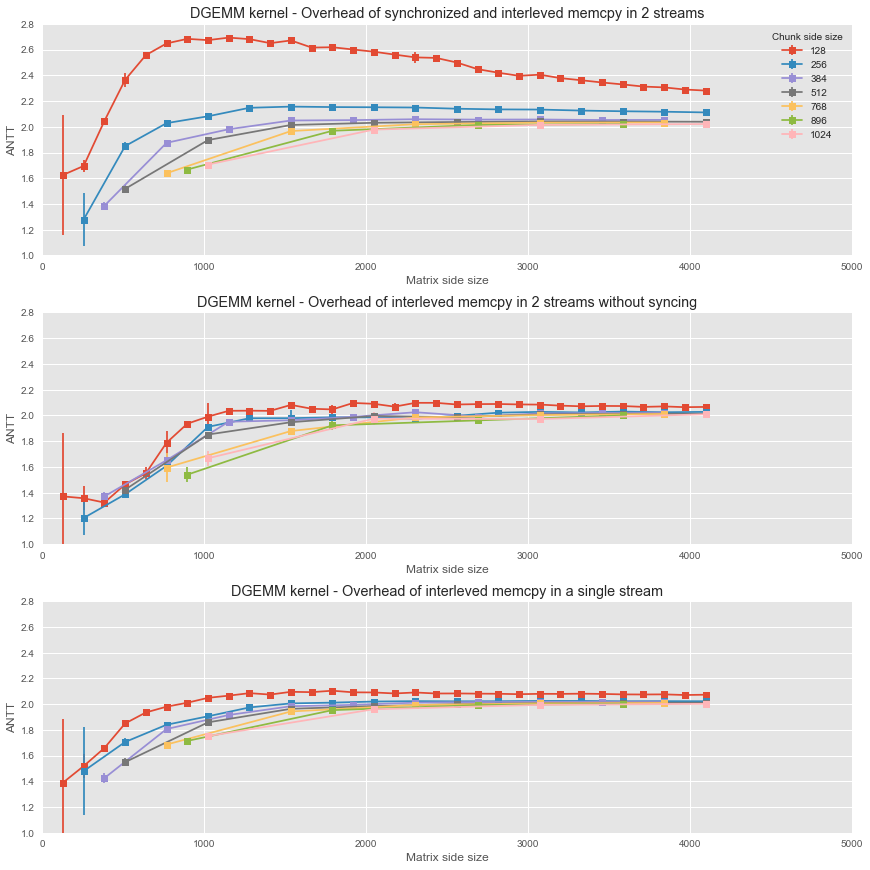

In [45]:
normalizeddf=dfsync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(311)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.legend([128,256,384,512,768,896,1024],title='Chunk side size')

plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
plt.ylim(1,2.8)

plt.xlim(0,5000)

normalizeddf=dfnosync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(312)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
plt.ylim(1,2.8)

plt.xlim(0,5000)

normalizeddf=dfsingle.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(313)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
plt.ylim(1,2.8)
plt.xlim(0,5000)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

[   6   24   54   96  150  216  294  384  486  600  726  864 1014 1176 1350
 1536 1734 1944 2166 2400 2646 2904 3174 3456 3750 4056 4374 4704 5046 5400
 5766 6144 6534 6936 7350 7776]
[ 131072  524288 1179648 2097152 4718592 6422528 8388608]
    no_chunksHtD  #size       Kernel  chunksize  normalized HtDtime
15            24    256  partition 2     131072            1.197791
17            24    512  partition 2     524288            1.029227
19            24    768  partition 2    1179648            1.003104
21            24   1024  partition 2    2097152            0.997043
23            24   1536  partition 2    4718592            1.007638
25            24   1792  partition 2    6422528            1.009726
27            24   2048  partition 2    8388608            1.006482


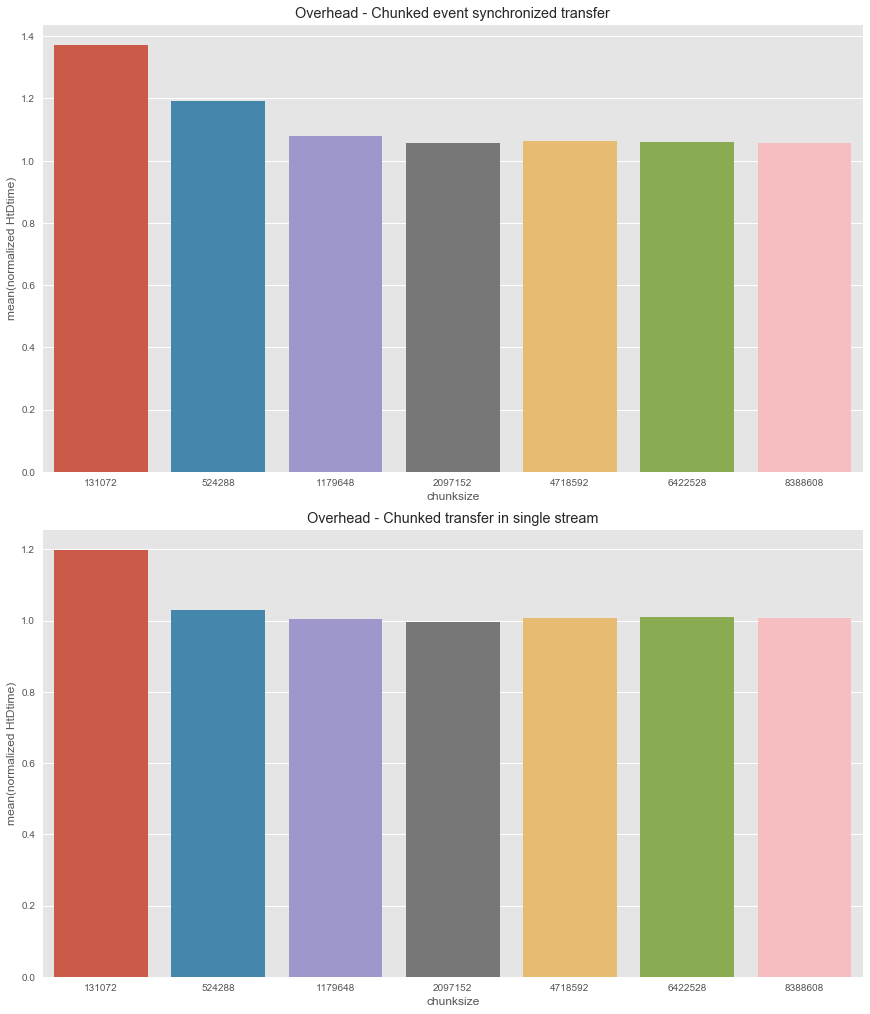

In [104]:
plt.figure(figsize=(12,14))
bl2 = blpart2[blpart2['Kernel']==" partition 1"]
plt.subplot(211)
chunks = 24

normalizeddf = dfsync.copy()
print normalizeddf['no_chunksHtD'].unique()
print normalizeddf['chunksize'].unique()


#normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl2['HtDtime'][bl2['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized HtDtime'] = normalizeddf['HtDtime'].apply(lambda x: x/avg) 
#normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'],as_index=False)['normalized HtDtime'].mean()
err=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'])['normalized HtDtime'].apply(np.std)
x=normalizeddf['no_chunksHtD'].unique()
ymod = y[y['Kernel']=='partition 2']

ymod = ymod[ymod['no_chunksHtD']==chunks]
#seaborn.barplot(x='no_chunksHtD',y='normalized HtDtime', hue='chunksize', data = ymod)
seaborn.barplot(x='chunksize',y='normalized HtDtime', data = ymod)



plt.title('Overhead - Chunked event synchronized transfer')


# plt.subplot(312)

# normalizeddf = dfnosync.copy()
# #normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# #normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl2['HtDtime'][bl2['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized HtDtime'] = normalizeddf['HtDtime'].apply(lambda x: x/avg) 
# #normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'],as_index=False)['normalized HtDtime'].mean()
# err=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'])['normalized HtDtime'].apply(np.std)
# x=normalizeddf['no_chunksHtD'].unique()
# ymod = y[y['Kernel']=='partition 2']

# ymod = ymod[ymod['no_chunksHtD']<=chunks]
# seaborn.barplot(x='no_chunksHtD',y='normalized HtDtime', hue='chunksize', data = ymod)
plt.subplot(212)

normalizeddf = dfsingle.copy()
#normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl2['HtDtime'][bl2['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized HtDtime'] = normalizeddf['HtDtime'].apply(lambda x: x/avg) 
#normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'],as_index=False)['normalized HtDtime'].mean()
err=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'])['normalized HtDtime'].apply(np.std)
x=normalizeddf['no_chunksHtD'].unique()
ymod = y[y['Kernel']=='partition 2']

ymod = ymod[ymod['no_chunksHtD']==chunks]
#seaborn.barplot(x='no_chunksHtD',y='normalized HtDtime', hue='chunksize', data = ymod)
seaborn.barplot(x='chunksize',y='normalized HtDtime', data = ymod)
plt.title('Overhead - Chunked transfer in single stream')


print ymod
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

[   2    8   18   32   50   72   98  128  162  200  242  288  338  392  450
  512  578  648  722  800  882  968 1058 1152 1250 1352 1458 1568 1682 1800
 1922 2048 2178 2312 2450 2592]
[ 131072  524288 1179648 2097152 4718592 6422528 8388608]
    no_chunksHtD  #size       Kernel  chunksize  normalized HtDtime
11             6    896  partition 2    6422528            0.984828
25            24   1792  partition 2    6422528            1.009726
39            54   2688  partition 2    6422528            1.017869
53            96   3584  partition 2    6422528            1.023624


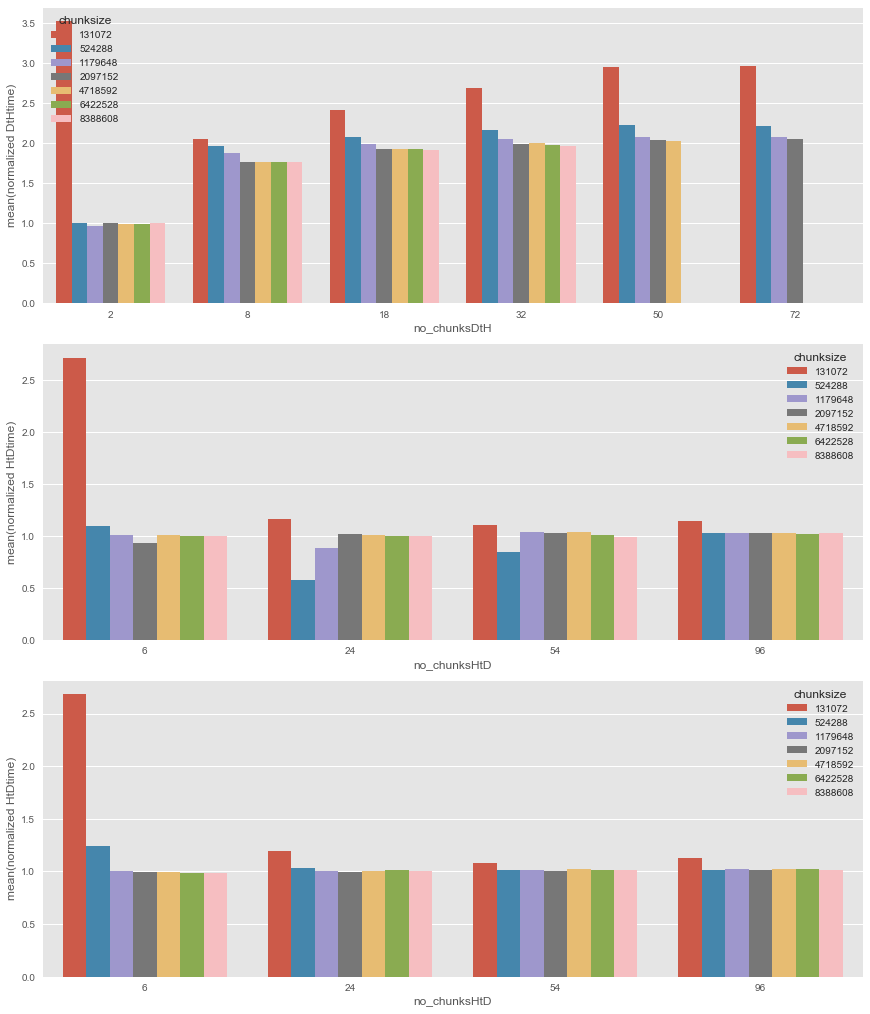

In [94]:
plt.figure(figsize=(12,14))
bl2 = blpart2[blpart2['Kernel']==" partition 1"]
plt.subplot(311)
chunks = 96

normalizeddf = dfsync.copy()
print normalizeddf['no_chunksDtH'].unique()
print normalizeddf['chunksize'].unique()


#normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl2['DtHtime'][bl2['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized DtHtime'] = normalizeddf['DtHtime'].apply(lambda x: x/avg) 
#normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['no_chunksDtH','#size','Kernel','chunksize'],as_index=False)['normalized DtHtime'].mean()
err=normalizeddf.groupby(['no_chunksDtH','#size','Kernel','chunksize'])['normalized DtHtime'].apply(np.std)
x=normalizeddf['no_chunksDtH'].unique()
ymod = y[y['Kernel']=='partition 2']

ymod = ymod[ymod['no_chunksDtH']<=chunks]
seaborn.barplot(x='no_chunksDtH',y='normalized DtHtime', hue='chunksize', data = ymod)

plt.subplot(312)

normalizeddf = dfnosync.copy()
#normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl2['HtDtime'][bl2['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized HtDtime'] = normalizeddf['HtDtime'].apply(lambda x: x/avg) 
#normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'],as_index=False)['normalized HtDtime'].mean()
err=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'])['normalized HtDtime'].apply(np.std)
x=normalizeddf['no_chunksHtD'].unique()
ymod = y[y['Kernel']=='partition 2']

ymod = ymod[ymod['no_chunksHtD']<=chunks]
seaborn.barplot(x='no_chunksHtD',y='normalized HtDtime', hue='chunksize', data = ymod)
plt.subplot(313)

normalizeddf = dfsingle.copy()
#normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl2['HtDtime'][bl2['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized HtDtime'] = normalizeddf['HtDtime'].apply(lambda x: x/avg) 
#normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'],as_index=False)['normalized HtDtime'].mean()
err=normalizeddf.groupby(['no_chunksHtD','#size','Kernel','chunksize'])['normalized HtDtime'].apply(np.std)
x=normalizeddf['no_chunksHtD'].unique()
ymod = y[y['Kernel']=='partition 2']

ymod = ymod[ymod['no_chunksHtD']<=chunks]
seaborn.barplot(x='no_chunksHtD',y='normalized HtDtime', hue='chunksize', data = ymod)

print ymod[ymod['chunksize']==6422528]
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [55]:
blpart2.head()

,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,128,4.194,0.104,0.0,1.259,65536,393216,131072,6,2,partition 0,0.115234,0.942871,0.079102
1,128,4.194,0.104,0.0,1.259,65536,393216,131072,6,2,partition 1,0.208252,0.942871,0.029053
2,128,4.194,0.077,0.0,0.698,65536,393216,131072,6,2,partition 0,0.102051,0.428955,0.045898
3,128,4.194,0.077,0.0,0.698,65536,393216,131072,6,2,partition 1,0.194092,0.428955,0.029297
4,128,4.194,0.076,0.0,0.771,65536,393216,131072,6,2,partition 0,0.096924,0.492188,0.065918
